# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [53]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [54]:
batch_size = 100

### Carregamento, criação dataset e do dataloader

In [55]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Número de minibatches de trenamento: 600

Dimensões dos dados de um minibatch: torch.Size([100, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


In [56]:
len(loader_train)

600

### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [57]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 600


## Modelo

In [58]:
model = torch.nn.Linear(28*28, 10)

In [59]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[-0.3442,  1.1717, -0.2304,  0.7642, -0.1781,  0.5323, -0.2424, -0.6295,
          0.3898,  0.3119]], grad_fn=<AddmmBackward0>)

In [60]:
x_train, y_train = next(iter(loader_train))
pred = model(x_train.view(-1, 784))
pred

tensor([[-2.6594e-01,  4.4068e-02,  3.2970e-03,  4.7114e-02,  1.7622e-01,
          3.2969e-01,  1.8841e-01,  2.1280e-02,  3.6058e-02,  2.0932e-01],
        [-4.3950e-01,  2.8415e-01, -4.8288e-03,  7.1906e-02,  8.7781e-02,
          3.5794e-01,  1.6956e-01, -1.4669e-01, -3.6228e-02,  9.2154e-02],
        [-1.8755e-01,  3.8619e-01,  7.2688e-02,  5.3794e-02, -4.3597e-02,
          2.5956e-01,  2.6681e-01,  2.7773e-02,  7.6680e-02,  7.6795e-02],
        [-2.3372e-01,  3.3555e-01, -2.7936e-01,  3.1527e-01, -1.0889e-01,
          1.9761e-01, -5.4682e-02, -1.4522e-01, -1.3730e-01, -2.5550e-01],
        [-2.6641e-01, -1.7647e-01, -1.4148e-01, -4.8208e-02,  5.6097e-02,
          2.9335e-02, -1.9751e-01,  1.4461e-01, -5.6374e-02,  7.1227e-02],
        [-3.9768e-01, -1.6238e-01,  6.6909e-02, -1.0672e-01, -3.1387e-02,
          1.2187e-01, -9.1213e-02,  1.4579e-01, -1.3140e-01,  5.4542e-02],
        [-5.9493e-02,  3.6100e-01,  1.3485e-01,  3.9684e-01,  1.5988e-01,
          4.1709e-01,  3.1658e-0

## Treinamento

### Inicialização dos parâmetros

In [61]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [62]:
epochs = []
losses = []
losses_epoch = []
best_loss_epoch = 100

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = x_train.view(-1, 28 * 28)
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, y_train)

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)
        if loss.data < best_loss_epoch:
            best_loss_epoch = loss.data
    losses_epoch.append(best_loss_epoch)

In [63]:
print('Final loss:', loss.data)

Final loss: tensor(0.2049)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

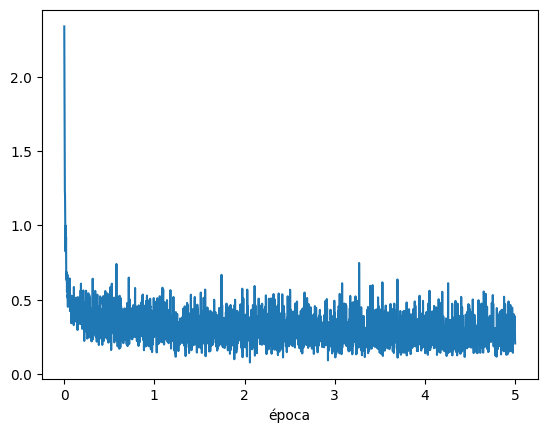

In [64]:
plt.plot(epochs, losses)
plt.xlabel('época')

In [65]:
n_epochs

5

Text(0.5, 0, 'época')

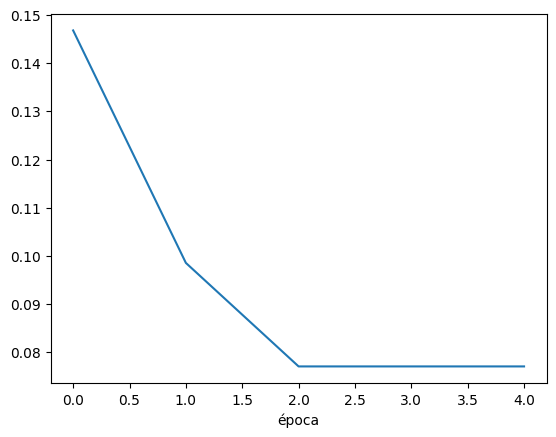

In [66]:
plt.plot(range(n_epochs), losses_epoch)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

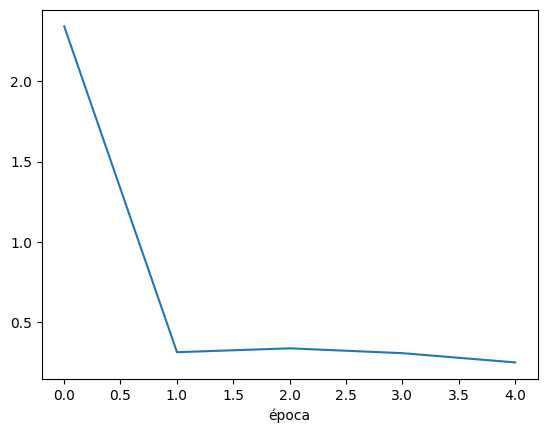

In [67]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch? **R.: 100**
2. Em uma época, quantos mini-batches existem? **R.: 60.000/100 = 600**
3. Qual é a definição de época? **R.: 600/100 = 6**

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600
2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

In [68]:
batch_size = 100
n_epochs = 5
learningRate = 0.5
dataset_dir = 'MNIST/'

# Recria o modelo e o otimizador para garantir um estado inicial
model = torch.nn.Linear(28*28, 10)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

# Carregamento do Dataset e DataLoader (assumindo que 'dataset_train' foi definido)
dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())
loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)


losses = []
epochs_list = [] # Renomeado para evitar conflito com 'epochs' no loop de comparação
total_trained_samples = 0

for i in range(n_epochs):
    for k, (x_train, y_train) in enumerate(loader_train):

        # 1. Forward
        inputs = x_train.view(-1, 28 * 28)
        outputs = model(inputs)

        # 2. Calcular Perda
        loss = criterion(outputs, y_train)

        # 3. Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # 4. Registrar e Imprimir (EXERCÍCIO 1)
        total_trained_samples += x_train.size(0)
        epochs_list.append(total_trained_samples / total_samples)
        losses.append(loss.item())

        print('Época: {}/{}, Batch: {}/{}'.format(i + 1, n_epochs, k + 1, n_batches_train))



Época: 1/5, Batch: 1/600
Época: 1/5, Batch: 2/600
Época: 1/5, Batch: 3/600
Época: 1/5, Batch: 4/600
Época: 1/5, Batch: 5/600
Época: 1/5, Batch: 6/600
Época: 1/5, Batch: 7/600
Época: 1/5, Batch: 8/600
Época: 1/5, Batch: 9/600
Época: 1/5, Batch: 10/600
Época: 1/5, Batch: 11/600
Época: 1/5, Batch: 12/600
Época: 1/5, Batch: 13/600
Época: 1/5, Batch: 14/600
Época: 1/5, Batch: 15/600
Época: 1/5, Batch: 16/600
Época: 1/5, Batch: 17/600
Época: 1/5, Batch: 18/600
Época: 1/5, Batch: 19/600
Época: 1/5, Batch: 20/600
Época: 1/5, Batch: 21/600
Época: 1/5, Batch: 22/600
Época: 1/5, Batch: 23/600
Época: 1/5, Batch: 24/600
Época: 1/5, Batch: 25/600
Época: 1/5, Batch: 26/600
Época: 1/5, Batch: 27/600
Época: 1/5, Batch: 28/600
Época: 1/5, Batch: 29/600
Época: 1/5, Batch: 30/600
Época: 1/5, Batch: 31/600
Época: 1/5, Batch: 32/600
Época: 1/5, Batch: 33/600
Época: 1/5, Batch: 34/600
Época: 1/5, Batch: 35/600
Época: 1/5, Batch: 36/600
Época: 1/5, Batch: 37/600
Época: 1/5, Batch: 38/600
Época: 1/5, Batch: 39


Perda final após treinamento: 0.25653260946273804


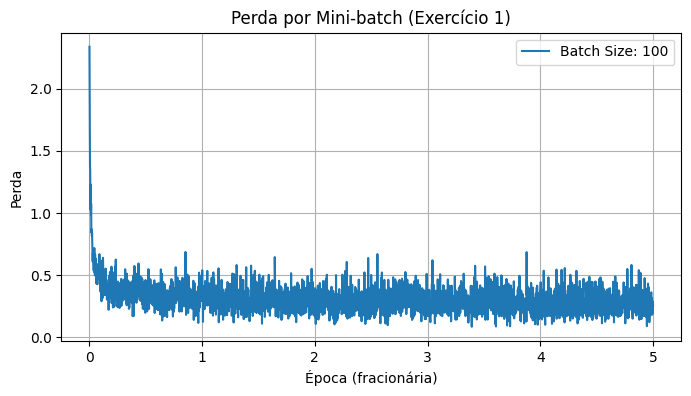

In [69]:
print('\nPerda final após treinamento:', loss.item())

# Plotagem da perda detalhada
plt.figure(figsize=(8, 4))
plt.plot(epochs_list, losses, label=f'Batch Size: {batch_size}')
plt.title('Perda por Mini-batch (Exercício 1)')
plt.xlabel('Época (fracionária)')
plt.ylabel('Perda')
plt.grid(True)
plt.legend()
plt.show()

In [70]:
batch_sizes = [32, 100, 500] # Tamanhos de mini-batch a serem comparados
n_epochs = 5
learningRate = 0.5
dataset_dir = 'MNIST/'

# Armazenará os resultados de perda para plotagem
all_losses = {}
all_epochs = {}

print(" Treinamento para Diferentes Tamanhos de Mini-batch ")

for bs in batch_sizes:
    print(f"\nIniciando treinamento com Batch Size: {bs}...")

    # Recria o modelo para garantir pesos iniciais aleatórios (igual para todos)
    model = torch.nn.Linear(28*28, 10)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

    # Carrega o DataLoader com o novo batch_size
    loader_train = DataLoader(dataset_train, batch_size=bs, shuffle=True)
    n_batches_train = len(loader_train)

    current_losses = []
    current_epochs = []
    total_trained_samples = 0

    # Laço de Treinamento
    for i in range(n_epochs):
        for k, (x_train, y_train) in enumerate(loader_train):

            # Forward e Transformação
            inputs = x_train.view(-1, 28 * 28)
            outputs = model(inputs)

            # Calcula Perda
            loss = criterion(outputs, y_train)

            # Backward e Atualização
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Registra dados
            total_trained_samples += x_train.size(0)
            current_epochs.append(total_trained_samples / total_samples)
            current_losses.append(loss.item())

    # Armazena resultados
    all_losses[bs] = current_losses
    all_epochs[bs] = current_epochs
    print(f"Treinamento com Batch Size {bs} concluído. Perda final: {loss.item():.4f}")


 Treinamento para Diferentes Tamanhos de Mini-batch 

Iniciando treinamento com Batch Size: 32...
Treinamento com Batch Size 32 concluído. Perda final: 0.5753

Iniciando treinamento com Batch Size: 100...
Treinamento com Batch Size 100 concluído. Perda final: 0.1902

Iniciando treinamento com Batch Size: 500...
Treinamento com Batch Size 500 concluído. Perda final: 0.3071


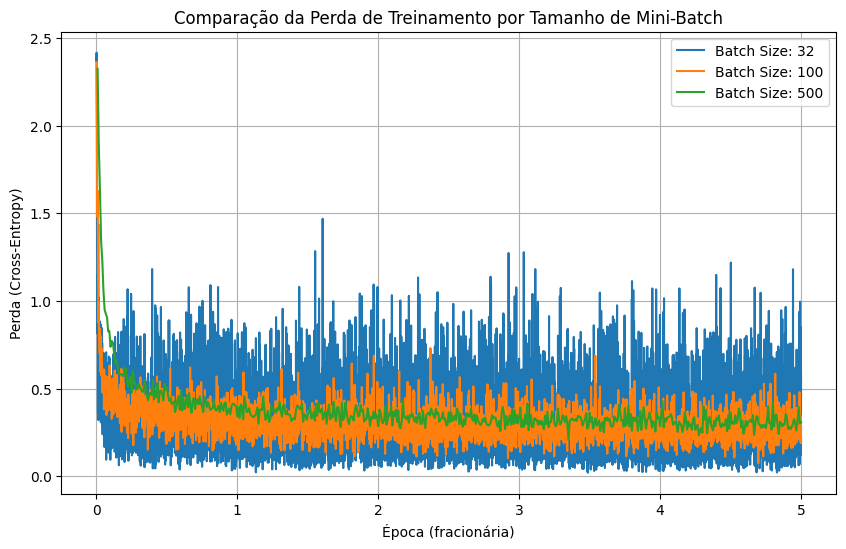

In [71]:
plt.figure(figsize=(10, 6))
plt.title('Comparação da Perda de Treinamento por Tamanho de Mini-Batch')
plt.xlabel('Época (fracionária)')
plt.ylabel('Perda (Cross-Entropy)')

for bs in batch_sizes:
    plt.plot(all_epochs[bs], all_losses[bs], label=f'Batch Size: {bs}')

plt.grid(True)
plt.legend()
plt.show()

## Conclusões sobre os experimentos deste notebook


- Mini-batches Pequenos (32): Resultaram no maior ruído na curva de perda (oscilações mais amplas), mas também parecem ter atingido a menor perda final média, o que é frequentemente associado a uma melhor capacidade de generalização e na fuga de mínimos locais ruins.

- Mini-batches Grandes (500): Produziram a curva de perda mais suave (menos ruído), pois o gradiente é uma estimativa mais precisa do gradiente real (batch-gradient). No entanto, a perda final média é visivelmente mais alta, sugerindo que o modelo pode ter convergido para um mínimo local menos ideal.

- Trade-off: O tamanho de mini-batch de 100 oferece um bom equilíbrio entre ruído e velocidade de convergência/qualidade final.